   # Question 1
 Learn and understand Zipf’s Law.
 Pick any file (or files) in NLTK package.
 Prove if Zipf’s Law works in Natural Language or not.

 REQUIREMNTS: (Must Do)
 Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
 Create at least one function and one lambda function.
 Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.
 Open your CSV file, generate a log-log figure according to the data you saved.
 Write a conclusion at the end of your code base on your figure. 

Importing Necessary Packages

In [43]:
import nltk
from nltk.corpus import gutenberg
import glob
import re
import csv
import matplotlib.pyplot as graphplot

Storing the text file into inputfile

In [11]:
datareader = glob.glob(nltk.data.find('corpora/gutenberg/chesterton-ball.txt'))
#storing chesterton-ball.txt file in inputfile
for words in datareader:
    with open(words) as text:
        inputfile = text.read()


In [ ]:
Printing Total Number Of Words and Letters in the txt file

In [22]:
# this can also be done by storing len(inputfile) and len(re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',inputfile ))
# in two different files
print('Total Number of Letters are : '+ str(len(inputfile)))
print('Total Number of Words are: '+ str(len(re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',inputfile ))))

Total Number of Letters are : 457450
Total Number of Words are: 62657


Function to calculate words and their frequency

In [24]:
total_words=re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',inputfile )
#word_frequency function calculates the total number of words and their frequency of occurence
word_frequency=dict()
for word in total_words:
    if word not in word_frequency:
        word_frequency[word]=1
    else:
        word_frequency[word] += 1
#using lambda to sort words
words_insorted_order = sorted(word_frequency.items(), key = lambda x : x[1] ,reverse = True)
print('Words with frequency : ' + str(words_insorted_order))

Words with frequency : [('the', 4523), ('and', 2488), ('that', 1120), ('was', 922), ('you', 882), ('his', 880), ('with', 799), ('said', 652), ('had', 556), ('Turnbull', 544), ('not', 479), ('The', 419), ('for', 414), ('have', 370), ('all', 354), ('they', 340), ('but', 339), ('man', 335), ('him', 334), ('like', 322), ('which', 321), ('this', 319), ('were', 316), ('are', 307), ('one', 295), ('out', 249), ('from', 239), ('other', 224), ('But', 218), ('into', 214), ('them', 211), ('there', 207), ('about', 201), ('will', 198), ('who', 188), ('your', 186), ('only', 185), ('And', 178), ('You', 177), ('more', 171), ('two', 170), ('what', 167), ('their', 166), ('some', 165), ('been', 143), ('Evan', 141), ('know', 139), ('would', 139), ('very', 134), ('when', 134), ('did', 134), ('face', 134), ('than', 133), ('down', 133), ('can', 131), ('little', 129), ('say', 126), ('God', 126), ('quite', 125), ('even', 122), ('has', 122), ('seemed', 121), ('then', 121), ('could', 117), ('see', 117), ('Then', 

To save function output in csv file with columns as Words, Frequency and Rank

In [45]:
with open(('chesterton-ball.csv'), 'w', newline="") as assignment1_csv:
            #writer is used to write into a csv file
            writer = csv.writer(assignment1_csv)
            writer.writerow(['Words', 'Frequency', 'Rank'])
            # dynamically increasing rank for each row which is added
            rank = 1
            for row in words_insorted_order:
                writer.writerow([row[0], row[1], rank])
                rank +=1
                csvfile.close

Graph Plot

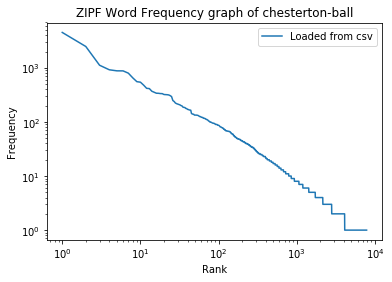

In [44]:
x = []
y = []

#csv file is saved with comma as a delimiter, we have to handle exceptional cases when there is a comma in the text
with open('chesterton-ball.csv','r') as assignment1_csv:
    csvreader = csv.reader(assignment1_csv)
    #to skip headers
    next(csvreader)

    #csvreader reads with , as a delimiter in the csv file
    
    for row in csvreader:
        x.append(int(row[2]))
        y.append(int(row[1]))

#labelling the graph
graphplot.loglog(x,y, label='Loaded from csv')
graphplot.xlabel('Rank')
graphplot.ylabel('Frequency')
graphplot.title('ZIPF Word Frequency graph of chesterton-ball')
graphplot.legend()
#displaying the graph
graphplot.show()

# Conclusion 
Zipf’s Law can be used for Natural Language Procession.
Important analysis can be done to findout which words frequency is higer, like the common words in the chesterton-ball file are articles and prepositions.
A similar pattern can be analyzed in various files.
Another import conclusion is when a column itself has commas, it is a problem to use csv delimiter comma.